<ErrorbarContainer object of 3 artists>

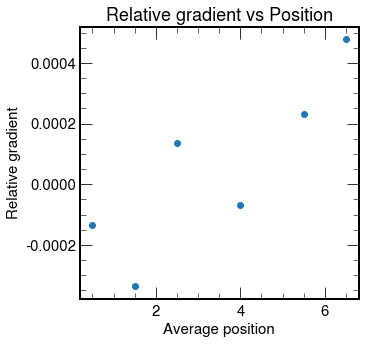

In [2]:
#Exp 1: Plotting (1/B)*(dB/dx) vs dx 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import mplhep as hep
hep.style.use("CMS")

y = np.array([-1.34E-04,-3.37E-04,1.36E-04,-6.71E-05,2.32E-04,4.78E-04])#(1/nominalB)*(dB/dx) the dx is the delta_x from the excel sheet
x = np.array([0.5, 1.5, 2.5, 4.0, 5.5, 6.5]) #(x1+x2)/2 avg space it occupies (Not the delta x)
x_error=0.002

#plt.plot(x_ar, y_ar, marker='o')
plt.figure(figsize=(5,5))
display(plt.errorbar(x, y, xerr = x_error, fmt ='o'))
plt.xlabel("Average position", fontsize=15, loc="center")
plt.ylabel("Relative gradient", fontsize=15, loc="center")
plt.title("Relative gradient vs Position", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

func1:
[502.94665021   4.53443899]
39.96672104488606
0.5428015647463594
func2:
[431.39754965   6.95017623]
18.525548502936417
1.2333970742489846
What function is this for? growth
This is chi-square for growth :  6.402403458174806
What function is this for? decay
This is chi-square for decay :  7.520827056002055


<ErrorbarContainer object of 3 artists>

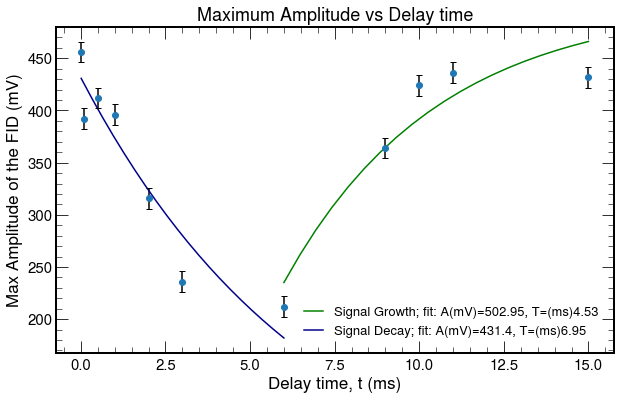

In [3]:
#Experiment 2: Spin Lattic Relaxation Time
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


maxAmp = [456,392,412,396,316,236,212,364,424,436,432] #in mV
delayT = [0.01,0.1,0.5,1,2,3,6,9,10,11,15] #in ms

def func1(t, A, T):
    return A*(1-2*np.exp(-t/T)) #the second part of the curve; growth

def func2(t, A, T):
    return A*(np.exp(-t/T)) #decay

popt, pcov = curve_fit(func1, delayT[6:], maxAmp[6:], p0=[456, 12])
print("func1:")
print(popt)
print(np.sqrt(pcov[0][0]))
print(np.sqrt(pcov[1][1]))
#print(np.sqrt(pcov[2][2]))

popt2, pcov2 = curve_fit(func2, delayT[:7], maxAmp[:7], p0=[456, 12])
print("func2:")
print(popt2)
print(np.sqrt(pcov2[0][0]))
print(np.sqrt(pcov2[1][1]))

delay = np.linspace(6, 15, 20)
delayy = np.linspace(0.01,6,20)


def chi_square(data, fit, error):
    '''data, fit, error must be lists of the same length'''
    name = input('What function is this for? ')
    square_residuals = []
    for i in range(0, len(data)):
        square_residuals.append((data[i]-fit[i])**2/(error[i])**2)
    Container = np.array([i for i in square_residuals])
    print('This is chi-square for {} : '.format(name),  np.sum(Container/len(data)) )

fitline1 = [func1(i, *popt) for i in delayT[6:]]

chi_square(maxAmp[6:], fitline1, 10*np.ones(len(fitline1)))

fitline2 = [func2(i, *popt2) for i in delayT[:7]]
chi_square(maxAmp[:7], fitline2, 10*np.ones(len(fitline2)))


# chisq = sum( (np.array([maxAmp[6:]]) - np.array([fitline1]))**2 / 100 )
# ndf=len(delay)-len(popt)
# chisq_reduced = chisq/float(ndf)
# print('Chi Squared: ', chisq)
# print('Degrees of freedom: ', ndf)
# print('Reduced Chi Square: ', chisq_reduced)


#plt.plot(delay, [func1(i, *popt) for i in delay], label='fit: A={}, T={}'.format(popt[0], popt[1]), color='green')      

#plt.plot(delayy, [func2(i, *popt2) for i in delayy], label='fit: A={}, T={}'.format(popt2[0], popt2[1]), color='red')      

#plt.errorbar(delayT, maxAmp, yerr=10, fmt='o', ecolor='black', capsize=3)

plt.figure(figsize=(10,6))
display(plt.plot(delay, [func1(i, *popt) for i in delay], label='Signal Growth; fit: A(mV)={}, T=(ms){}'.format(np.round(popt[0],2), np.round(popt[1],2)), color='green'))
display(plt.plot(delayy, [func2(i, *popt2) for i in delayy], label='Signal Decay; fit: A(mV)={}, T=(ms){}'.format(np.round(popt2[0],2), np.round(popt2[1],2)), color='darkblue'))
display(plt.errorbar(delayT, maxAmp, yerr=10, fmt='o', ecolor='black', capsize=3))

plt.xlabel("Delay time, t (ms)", fontsize=17, loc='center')
plt.ylabel("Max Amplitude of the FID (mV)", fontsize=17, loc='center')
plt.legend(prop = {'size' : 13}, loc = 'lower right', borderpad=0.7, labelspacing=0.5)
plt.title("Maximum Amplitude vs Delay time", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()



[346.04410767   8.40950181]
2.712614451008558
0.2207589927481272
What function is this for? d
This is chi-square for d :  4.143739617624668


<ErrorbarContainer object of 3 artists>

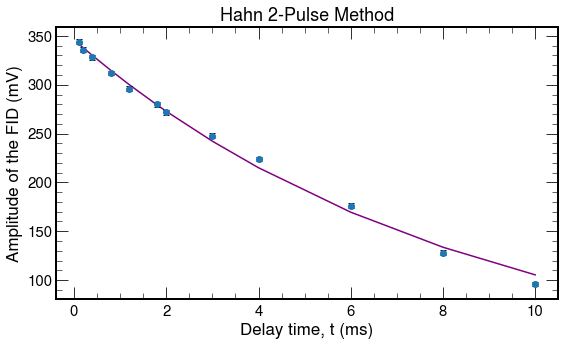

In [5]:
#Experiment 3: Spin-Spin Relaxation time
#Part 1: 2 Pulse Spin Echo (Hahn 2 pulse)
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

amplitude = [344,336,328,312,296,280,272,248,224,176,128,96]
#amplitude = [512,520,496,488,480,464,456,440,416,384,352,320]
delaytime = [0.10,0.20,0.40,0.80,1.20,1.80,2.00,3.00,4.00,6.00,8.00,10.00] #2*tau
#delaytime = [0.05,0.10,0.20,0.40,0.60,0.90,1.00,1.50,2.00,3.00,4.00,5.00]


def decay(t, A, T):
    return A*(np.exp(-t/T))

popt, pcov = curve_fit(decay, delaytime, amplitude, p0=[344, 52])
print(popt)
print(np.sqrt(pcov[0][0]))
print(np.sqrt(pcov[1][1]))

delayy = np.linspace(0.10, 10.00, 20)

def chi_square(data, fit, error):
    '''data, fit, error must be lists of the same length'''
    name = input('What function is this for? ')
    square_residuals = []
    for i in range(0, len(data)):
        square_residuals.append((data[i]-fit[i])**2/(error[i])**2)
    Container = np.array([i for i in square_residuals])
    print('This is chi-square for {} : '.format(name),  np.sum(Container/len(data)) )

fitline1 = [decay(i, *popt) for i in delaytime]

chi_square(amplitude, fitline1, 2.5*np.ones(len(fitline1)))

plt.figure(figsize=(9,5))
display(plt.plot(delaytime, [decay(i, *popt) for i in delaytime], label='fit: A={}, T={}'.format(popt[0], popt[1]), color='purple')) 
display(plt.errorbar(delaytime, amplitude, yerr=2.5, fmt='o', ecolor='black', capsize=3))
plt.xlabel("Delay time, t (ms)", fontsize=17, loc='center')
plt.ylabel("Amplitude of the FID (mV)", fontsize=17, loc='center')
plt.title("Hahn 2-Pulse Method", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
#TO DO ON THIS PLOT: title, legend, show gabby

[320.28435354   1.08817181]
13.613565598852015
0.06823875029238832
What function is this for? l
This is chi-square for l :  17.803655423713177


C:\Users\aditi\AppData\Local\Temp/ipykernel_21356/2198515352.py:38: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  display(plt.errorbar(tau, amp, marker='x', color='black', yerr=2.5, fmt='o', ecolor='green', capsize=3))


<ErrorbarContainer object of 3 artists>

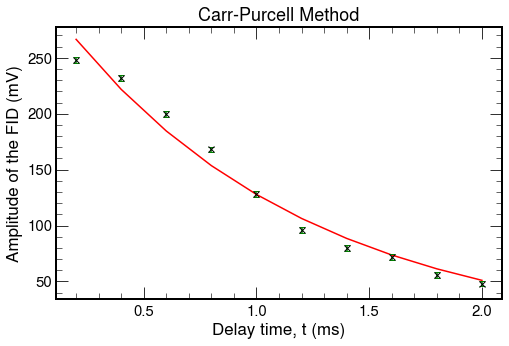

In [6]:
#Experiment 3: Spin-Spin Relaxation time
#Part 2: Carr-Purrcell

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

amp = [248,232,200,168,128,96,80,72,56,48] 
tau = [0.20,0.40,0.60,0.80,1.0,1.20,1.40,1.60,1.80,2.00]

# plt.scatter(delayt, amp, marker='x', label='Amplitude')
# plt.legend()
# plt.show()

def decay3(t, A, T):
    return A*(np.exp(-t/T))

popt, pcov = curve_fit(decay3, tau, amp, p0=[248, 12])
print(popt)
print(np.sqrt(pcov[0][0]))
print(np.sqrt(pcov[1][1]))

def chi_square(data, fit, error):
    '''data, fit, error must be lists of the same length'''
    name = input('What function is this for? ')
    square_residuals = []
    for i in range(0, len(data)):
        square_residuals.append((data[i]-fit[i])**2/(error[i])**2)
    Container = np.array([i for i in square_residuals])
    print('This is chi-square for {} : '.format(name),  np.sum(Container/len(data)) )

fitline1 = [decay3(i, *popt) for i in tau]

chi_square(amp, fitline1, 2.5*np.ones(len(fitline1)))

plt.figure(figsize=(8,5))
display(plt.plot(tau, [decay3(i, *popt) for i in tau], label='fit: A={}, T={}'.format(popt[0], popt[1]), color='red')) 
display(plt.errorbar(tau, amp, marker='x', color='black', yerr=2.5, fmt='o', ecolor='green', capsize=3))
plt.xlabel("Delay time, t (ms)", fontsize=17, loc='center')
plt.ylabel("Amplitude of the FID (mV)", fontsize=17, loc='center')
plt.title("Carr-Purcell Method", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

[322.67174253   1.0417493 ]
9.040006650645763
0.04222694560939829
What function is this for? d
This is chi-square for d :  7.515109888568141


C:\Users\aditi\AppData\Local\Temp/ipykernel_21356/3151444630.py:33: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  display(plt.errorbar(delaytime, amp2, marker='x', color='black', yerr=2.5, fmt='o', ecolor='darkblue', capsize=3))


<ErrorbarContainer object of 3 artists>

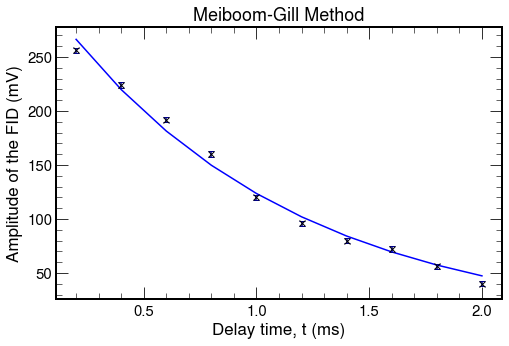

In [7]:
#Experiment 3: Spin-Spin Relaxation time
#Part 2: Meiboom-Gill
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

amp2 =[256,224,192,160,120,96,80,72,56,40]
delaytime = [0.20,0.40,0.60,0.80,1.00,1.20,1.40,1.60,1.80,2.00]

def decay3(t, A, T):
    return A*(np.exp(-t/T))

popt, pcov = curve_fit(decay3, delaytime, amp2, p0=[256, 12])
print(popt)
print(np.sqrt(pcov[0][0]))
print(np.sqrt(pcov[1][1]))

def chi_square(data, fit, error):
    '''data, fit, error must be lists of the same length'''
    name = input('What function is this for? ')
    square_residuals = []
    for i in range(0, len(data)):
        square_residuals.append((data[i]-fit[i])**2/(error[i])**2)
    Container = np.array([i for i in square_residuals])
    print('This is chi-square for {} : '.format(name),  np.sum(Container/len(data)) )

fitline1 = [decay(i, *popt) for i in delaytime]

chi_square(amp2, fitline1, 2.5*np.ones(len(fitline1)))

plt.figure(figsize=(8,5))
display(plt.plot(delaytime, [decay3(i, *popt) for i in delaytime], label='fit: A={}, T={}'.format(popt[0], popt[1]), color='blue')) 
display(plt.errorbar(delaytime, amp2, marker='x', color='black', yerr=2.5, fmt='o', ecolor='darkblue', capsize=3))
plt.xlabel("Delay time, t (ms)", fontsize=17, loc='center')
plt.ylabel("Amplitude of the FID (mV)", fontsize=17, loc='center')
plt.title("Meiboom-Gill Method", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

func1:
[222.72566568   3.61776461]
8.818262439349969
0.30509027388238763
func2:
[228.03002804  23.50262268]
3.9184574766585474
2.3385075690711825
What function is this for? growth
This is chi-square for growth :  7.601764738476086
What function is this for? decay
This is chi-square for decay :  5.85450488446323


<ErrorbarContainer object of 3 artists>

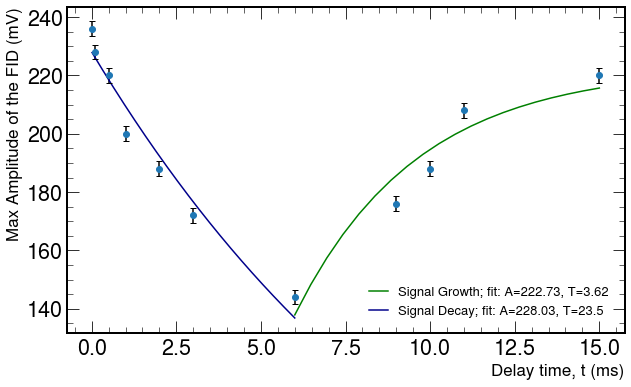

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


maxAmp = [236,228,220,200,188,172,144,176,188,208,220] #in mV
delayT = [0.02,0.1,0.5,1,2,3,6,9,10,11,15] #in ms
#0.01,0.1,0.5,1,2,3,6,9,10,11,15

def func1(t, A, T):
    return A*(1-2*np.exp(-t/T)) #the second part of the curve; growth

def func2(t, A, T):
    return A*(np.exp(-2*t/T)) #decay

popt, pcov = curve_fit(func1, delayT[6:], maxAmp[6:], p0=[236, 12])
print("func1:")
print(popt)
print(np.sqrt(pcov[0][0]))
print(np.sqrt(pcov[1][1]))
#print(np.sqrt(pcov[2][2]))

popt2, pcov2 = curve_fit(func2, delayT[:7], maxAmp[:7], p0=[236, 12])
print("func2:")
print(popt2)
print(np.sqrt(pcov2[0][0]))
print(np.sqrt(pcov2[1][1]))

delay = np.linspace(6, 15, 20)
delayy = np.linspace(0.01,6,20)


def chi_square(data, fit, error):
    '''data, fit, error must be lists of the same length'''
    name = input('What function is this for? ')
    square_residuals = []
    for i in range(0, len(data)):
        square_residuals.append((data[i]-fit[i])**2/(error[i])**2)
    Container = np.array([i for i in square_residuals])
    print('This is chi-square for {} : '.format(name),  np.sum(Container/len(data)) )

fitline1 = [func1(i, *popt) for i in delayT[6:]]

chi_square(maxAmp[6:], fitline1, 2.5*np.ones(len(fitline1)))

fitline2 = [func2(i, *popt2) for i in delayT[:7]]
chi_square(maxAmp[:7], fitline2, 2.5*np.ones(len(fitline2)))


# chisq = sum( (np.array([maxAmp[6:]]) - np.array([fitline1]))**2 / 100 )
# ndf=len(delay)-len(popt)
# chisq_reduced = chisq/float(ndf)
# print('Chi Squared: ', chisq)
# print('Degrees of freedom: ', ndf)
# print('Reduced Chi Square: ', chisq_reduced)


#plt.plot(delay, [func1(i, *popt) for i in delay], label='fit: A={}, T={}'.format(popt[0], popt[1]), color='green')      

#plt.plot(delayy, [func2(i, *popt2) for i in delayy], label='fit: A={}, T={}'.format(popt2[0], popt2[1]), color='red')      

#plt.errorbar(delayT, maxAmp, yerr=10, fmt='o', ecolor='black', capsize=3)

plt.figure(figsize=(10,6))
display(plt.plot(delay, [func1(i, *popt) for i in delay], label='Signal Growth; fit: A={}, T={}'.format(np.round(popt[0],2), np.round(popt[1],2)), color='green'))
display(plt.plot(delayy, [func2(i, *popt2) for i in delayy], label='Signal Decay; fit: A={}, T={}'.format(np.round(popt2[0],2), np.round(popt2[1],2)), color='darkblue'))
display(plt.errorbar(delayT, maxAmp, yerr=2.5, fmt='o', ecolor='black', capsize=3))

plt.xlabel("Delay time, t (ms)", fontsize=17)
plt.ylabel("Max Amplitude of the FID (mV)", fontsize=17)
plt.legend(prop = {'size' : 13}, loc = 'lower right', borderpad=0.7, labelspacing=0.5)
plt.show()
